<a href="https://colab.research.google.com/github/susan291-gifs/SussieAssignment/blob/main/BinaryClassificationOfIris_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

###Problem 1

In [ ]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]  # Using 'species' instead of 'target'

selected_species = ['versicolor', 'virginica']
selected_data = iris_df[iris_df['species'].isin(selected_species)]

selected_features = ['sepal length (cm)', 'petal length (cm)']
selected_data = selected_data[selected_features + ['species']]

print(selected_data.head)

<bound method NDFrame.head of      sepal length (cm)  petal length (cm)     species
50                 7.0                4.7  versicolor
51                 6.4                4.5  versicolor
52                 6.9                4.9  versicolor
53                 5.5                4.0  versicolor
54                 6.5                4.6  versicolor
..                 ...                ...         ...
145                6.7                5.2   virginica
146                6.3                5.0   virginica
147                6.5                5.2   virginica
148                6.2                5.4   virginica
149                5.9                5.1   virginica

[100 rows x 3 columns]>


###Problem 2

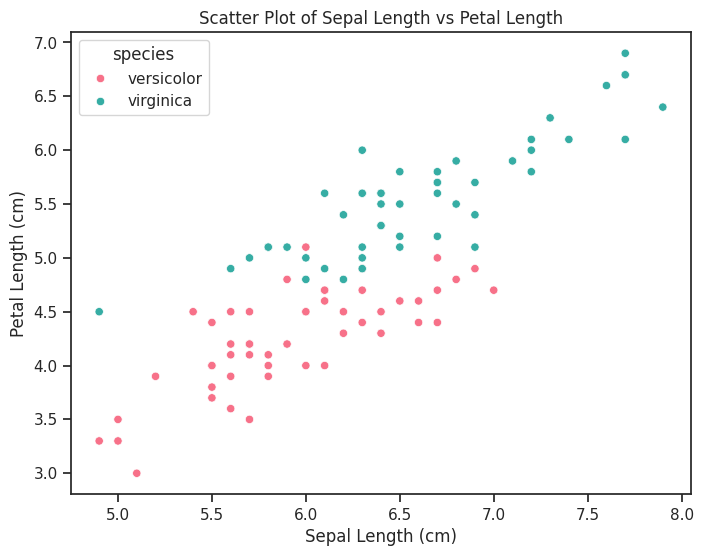

<ipython-input-39-68134157ce25>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=selected_data, x='species', y='sepal length (cm)', palette='husl')


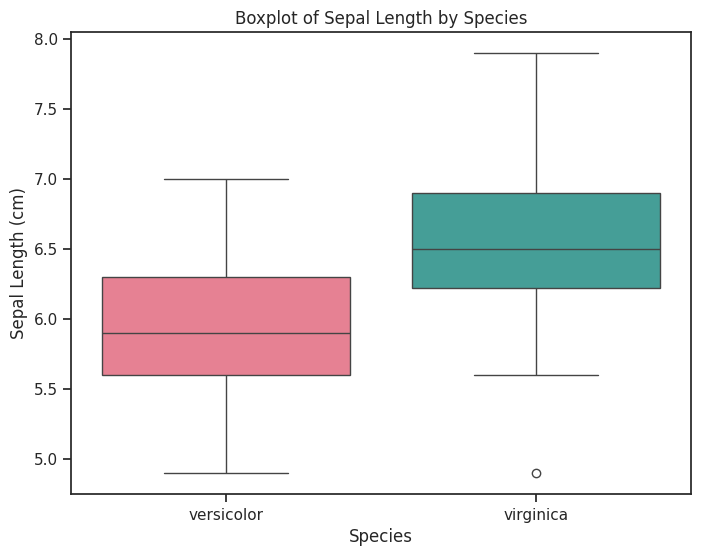

<ipython-input-39-68134157ce25>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=selected_data, x='species', y='petal length (cm)', palette='husl')


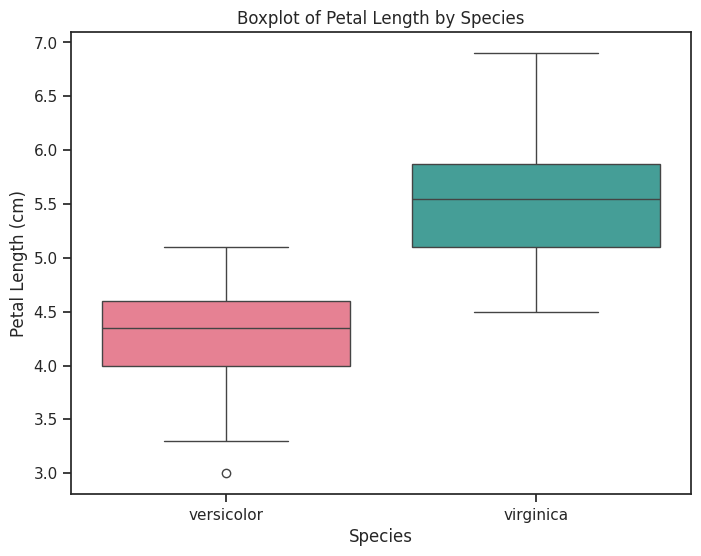

<ipython-input-39-68134157ce25>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=selected_data, x='species', y='sepal length (cm)', palette='husl')


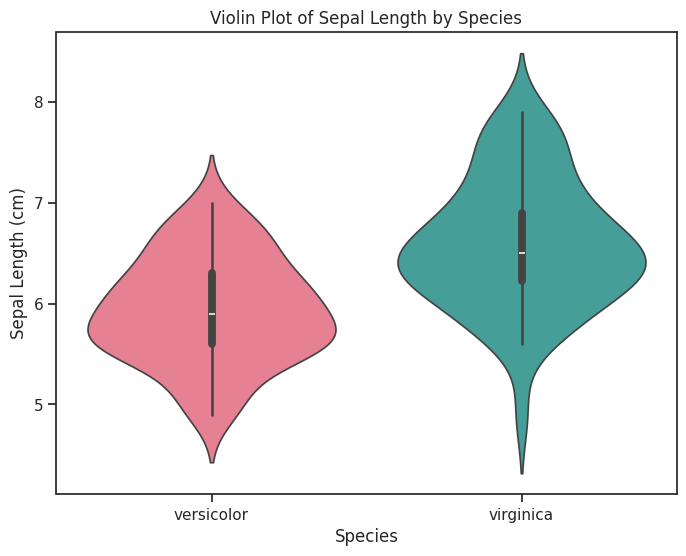

<ipython-input-39-68134157ce25>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=selected_data, x='species', y='petal length (cm)', palette='husl')


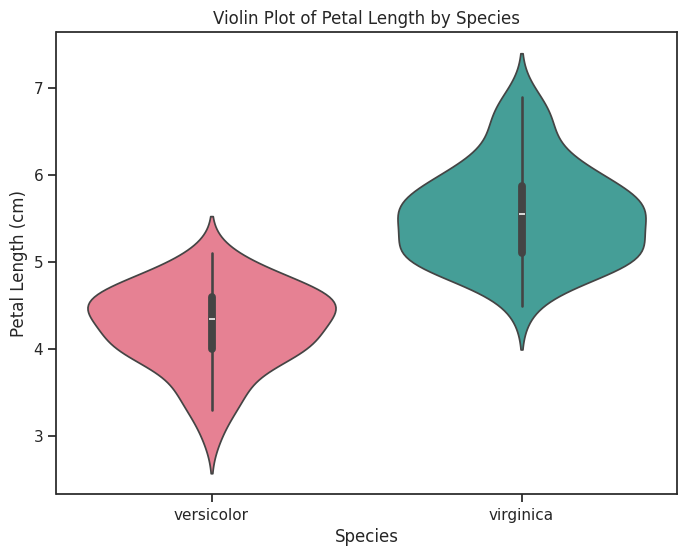

In [ ]:
sns.set(style="ticks")

plt.figure(figsize=(8, 6))
sns.scatterplot(data=selected_data, x='sepal length (cm)', y='petal length (cm)', hue='species', palette='husl')
plt.title('Scatter Plot of Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=selected_data, x='species', y='sepal length (cm)', palette='husl')
plt.title('Boxplot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=selected_data, x='species', y='petal length (cm)', palette='husl')
plt.title('Boxplot of Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(data=selected_data, x='species', y='sepal length (cm)', palette='husl')
plt.title('Violin Plot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(data=selected_data, x='species', y='petal length (cm)', palette='husl')
plt.title('Violin Plot of Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

###Problem 3

In [ ]:
X = selected_data[['sepal length (cm)', 'petal length (cm)']].values
y = np.where(selected_data['species'] == 'versicolor', 0, 1)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (75, 2)
y_train shape: (75,)
X_val shape: (25, 2)
y_val shape: (25,)


###Problem 4

In [ ]:
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


print("Scaled X_train:")
print(X_train_scaled[:5])
print("\nScaled X_val:")
print(X_val_scaled[:5])

Scaled X_train:
[[ 0.62124015 -0.65893772]
 [-1.15373171 -0.65893772]
 [ 0.02958286  0.05557306]
 [-1.59747467 -1.25436337]
 [ 2.10038336  2.08002027]]

Scaled X_val:
[[ 0.02958286  0.17465819]
 [ 0.02958286  0.77008384]
 [ 0.91706879  0.88916897]
 [-0.85790306 -0.89710798]
 [-1.00581738 -0.89710798]]


###Problem 5

In [ ]:

def train_and_evaluate(n_neighbors, X_train, y_train, X_val, y_val):
    """
    Train a k-nearest neighbors classifier and evaluate its performance on validation data.

    Parameters:
        n_neighbors (int): Number of neighbors for kNN classifier.
        X_train (ndarray): Training features.
        y_train (ndarray): Training labels.
        X_val (ndarray): Validation features.
        y_val (ndarray): Validation labels.

    Returns:
        model: Trained kNN classifier model.
    """
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy for {n_neighbors}-NN: {accuracy:.2f}")

    return knn

n_neighbors_list = [1, 3, 5]

classifiers = []

for n_neighbors in n_neighbors_list:
    print(f"\nTraining and evaluating {n_neighbors}-NN classifier:")
    knn_classifier = train_and_evaluate(n_neighbors, X_train_scaled, y_train, X_val_scaled, y_val)
    classifiers.append(knn_classifier)


Training and evaluating 1-NN classifier:
Accuracy for 1-NN: 1.00

Training and evaluating 3-NN classifier:
Accuracy for 3-NN: 1.00

Training and evaluating 5-NN classifier:
Accuracy for 5-NN: 1.00


###Problem 6

In [ ]:
def evaluate_model(model, X_val, y_val):
    """
    Evaluate a trained model on validation data and print evaluation metrics.

    Parameters:
        model: Trained classification model.
        X_val (ndarray): Validation features.
        y_val (ndarray): Validation labels.
    """

    y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)


    print("Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_val, y_pred))


for n_neighbors, knn_classifier in zip(n_neighbors_list, classifiers):
    print(f"\nEvaluation for {n_neighbors}-NN classifier:")
    evaluate_model(knn_classifier, X_val_scaled, y_val)


Evaluation for 1-NN classifier:
Evaluation Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00

Confusion Matrix:
[[25]]

Evaluation for 3-NN classifier:
Evaluation Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00

Confusion Matrix:
[[25]]

Evaluation for 5-NN classifier:
Evaluation Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00

Confusion Matrix:
[[25]]


###Problem 7

In [ ]:
def decision_region(X, y, model, step=0.01, title='Decision Region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Visualizes the decision region of a binary classification model trained on 2-dimensional features.

    Parameters:
    X : ndarray, shape(n_samples, 2)
        Feature matrix.
    y : ndarray, shape(n_samples,)
        Target vector.
    model : object
        Trained classification model instance.
    step : float, optional (default=0.01)
        Step size for meshgrid.
    title : str, optional (default='Decision Region')
        Title of the plot.
    xlabel : str, optional (default='xlabel')
        Label for the x-axis.
    ylabel : str, optional (default='ylabel')
        Label for the y-axis.
    target_names : list of str, optional (default=['versicolor', 'virginica'])
        Names of the target classes for legend.
    """
    # Setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = len(np.unique(y))

    # Create meshgrid
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step),
                                   np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)

    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    plt.legend()
    plt.show()


Decision region visualization for 1-NN classifier:


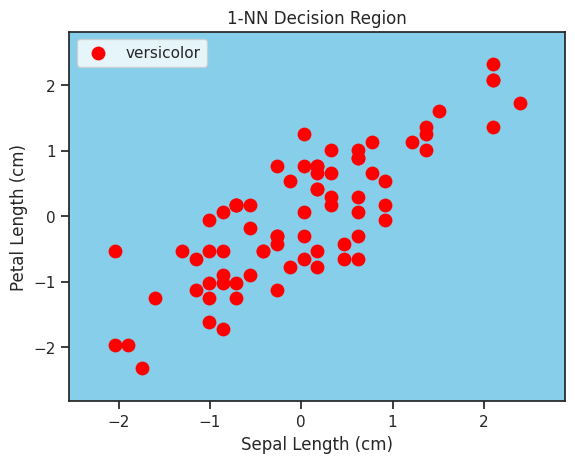


Decision region visualization for 3-NN classifier:


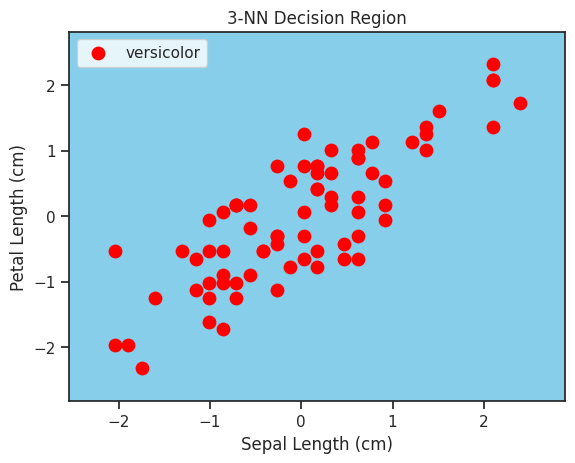


Decision region visualization for 5-NN classifier:


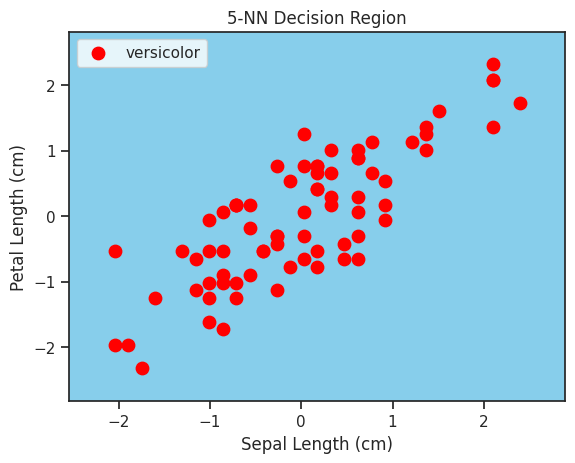

In [ ]:
def visualize_decision_region(X, y, model, title):
    decision_region(X, y, model, title=title, xlabel='Sepal Length (cm)', ylabel='Petal Length (cm)')


for n_neighbors, knn_classifier in zip(n_neighbors_list, classifiers):
    print(f"\nDecision region visualization for {n_neighbors}-NN classifier:")
    visualize_decision_region(X_train_scaled, y_train, knn_classifier, title=f"{n_neighbors}-NN Decision Region")

###Problem 8

###KNeighborsClassifier

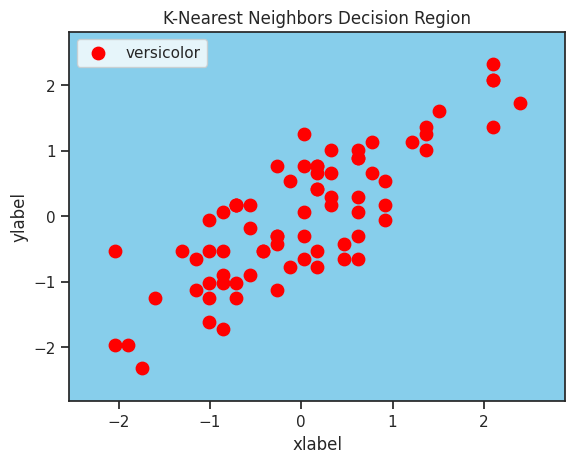

In [ ]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)

# Estimate
y_pred_knn = knn_classifier.predict(X_val_scaled)

# Evaluate
accuracy_knn = accuracy_score(y_val, y_pred_knn)
precision_knn = precision_score(y_val, y_pred_knn)
recall_knn = recall_score(y_val, y_pred_knn)
f1_knn = f1_score(y_val, y_pred_knn)

# Visualize
decision_region(X_train_scaled, y_train, knn_classifier, title='K-Nearest Neighbors Decision Region')

###Logistic Regression

In [ ]:
print("Unique classes in y_train:", np.unique(y_train))
print("Unique classes in y_val:", np.unique(y_val))


Unique classes in y_train: [1]
Unique classes in y_val: [1]


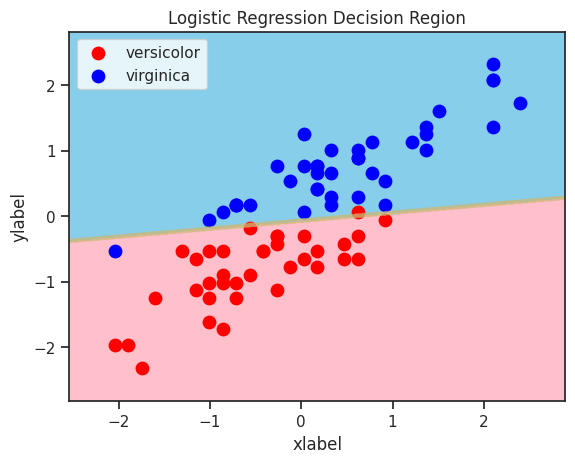

In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)


y_pred_logistic = logistic_regression.predict(X_val_scaled)


accuracy_logistic = accuracy_score(y_val, y_pred_logistic)
precision_logistic = precision_score(y_val, y_pred_logistic)
recall_logistic = recall_score(y_val, y_pred_logistic)
f1_logistic = f1_score(y_val, y_pred_logistic)


decision_region(X_train_scaled, y_train, logistic_regression, title='Logistic Regression Decision Region')

###Support Vector Machine

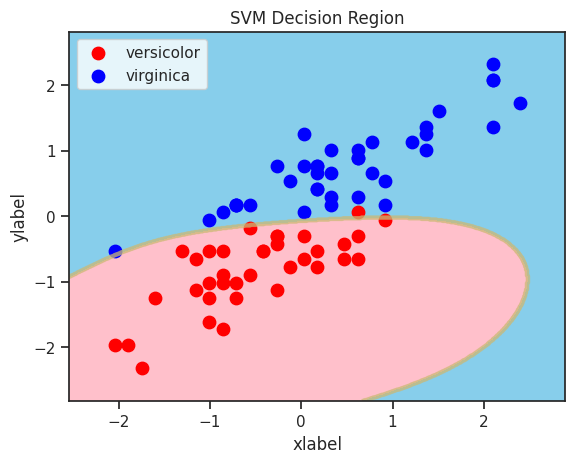

In [ ]:
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)

y_pred_svm = svm_classifier.predict(X_val_scaled)

accuracy_svm = accuracy_score(y_val, y_pred_svm)
precision_svm = precision_score(y_val, y_pred_svm)
recall_svm = recall_score(y_val, y_pred_svm)
f1_svm = f1_score(y_val, y_pred_svm)

decision_region(X_train_scaled, y_train, svm_classifier, title='SVM Decision Region')

###Decision Trees

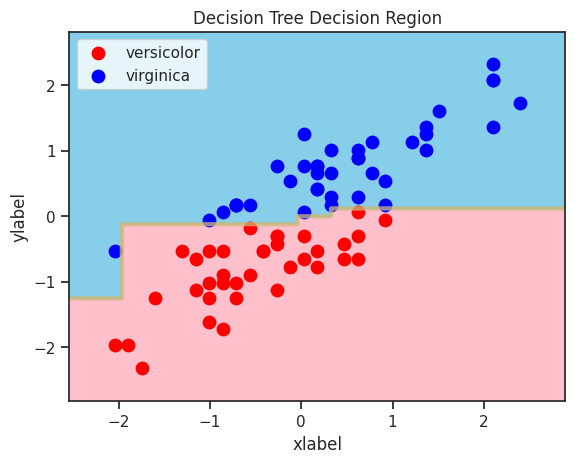

In [ ]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train_scaled, y_train)

y_pred_tree = tree_classifier.predict(X_val_scaled)

accuracy_tree = accuracy_score(y_val, y_pred_tree)
precision_tree = precision_score(y_val, y_pred_tree)
recall_tree = recall_score(y_val, y_pred_tree)
f1_tree = f1_score(y_val, y_pred_tree)

decision_region(X_train_scaled, y_train, tree_classifier, title='Decision Tree Decision Region')

###Random Forest

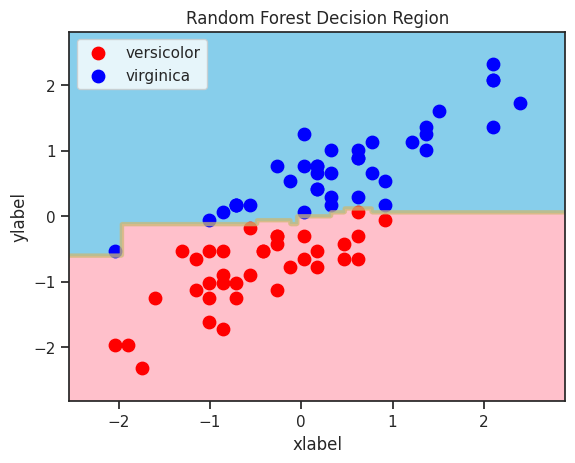

In [ ]:
forest_classifier = RandomForestClassifier()
forest_classifier.fit(X_train_scaled, y_train)


y_pred_forest = forest_classifier.predict(X_val_scaled)


accuracy_forest = accuracy_score(y_val, y_pred_forest)
precision_forest = precision_score(y_val, y_pred_forest)
recall_forest = recall_score(y_val, y_pred_forest)
f1_forest = f1_score(y_val, y_pred_forest)


decision_region(X_train_scaled, y_train, forest_classifier, title='Random Forest Decision Region')


Decision region visualization for K-Nearest Neighbors:


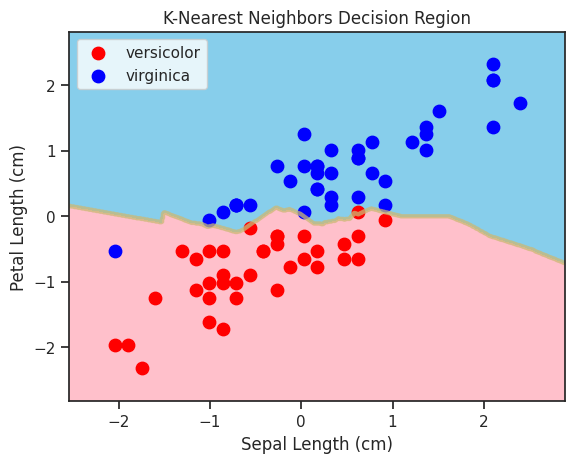


Evaluation metrics for K-Nearest Neighbors:
Accuracy: 0.80
Precision: 0.88
Recall: 0.64
F1-score: 0.74

Decision region visualization for Logistic Regression:


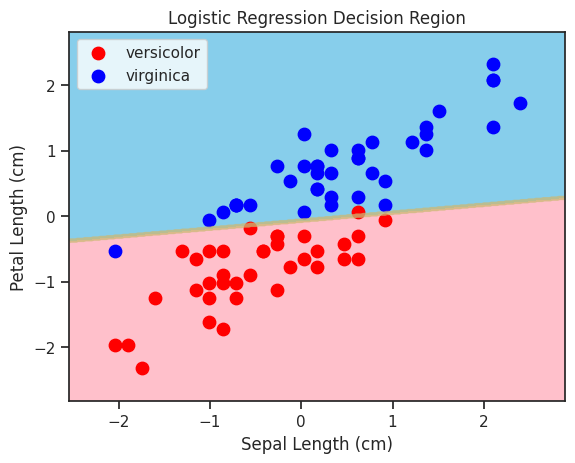


Evaluation metrics for Logistic Regression:
Accuracy: 0.84
Precision: 0.82
Recall: 0.82
F1-score: 0.82

Decision region visualization for SVM:


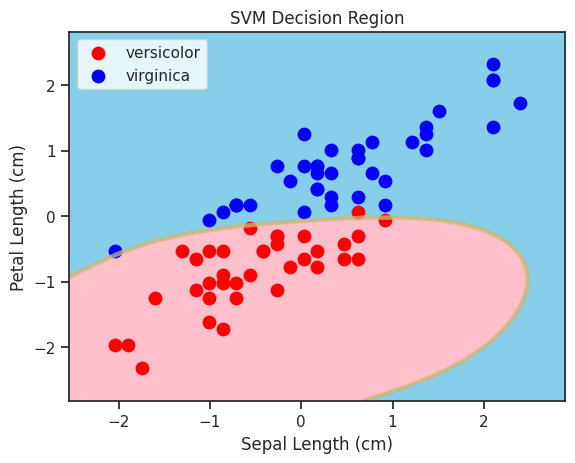


Evaluation metrics for SVM:
Accuracy: 0.84
Precision: 0.82
Recall: 0.82
F1-score: 0.82

Decision region visualization for Decision Tree:


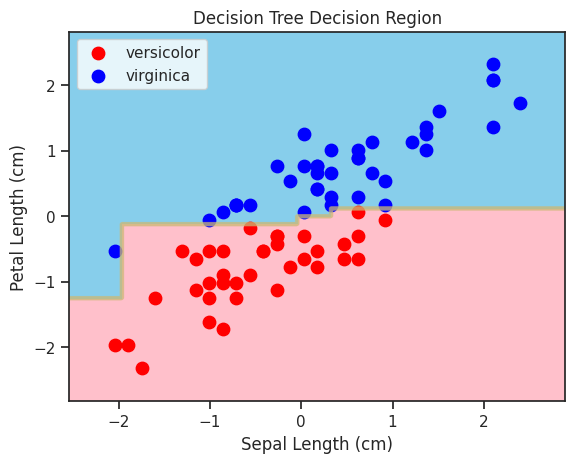


Evaluation metrics for Decision Tree:
Accuracy: 0.84
Precision: 0.89
Recall: 0.73
F1-score: 0.80

Decision region visualization for Random Forest:


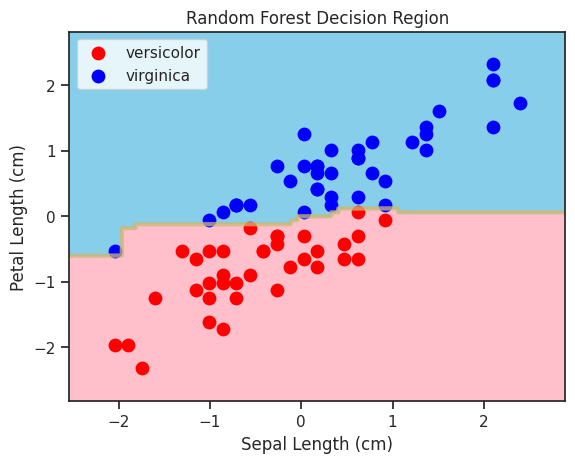


Evaluation metrics for Random Forest:
Accuracy: 0.84
Precision: 0.89
Recall: 0.73
F1-score: 0.80


In [ ]:
classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for method, clf in classifiers.items():

    clf.fit(X_train_scaled, y_train)


    y_pred = clf.predict(X_val_scaled)


    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    print(f"\nDecision region visualization for {method}:")
    visualize_decision_region(X_train_scaled, y_train, clf, title=f"{method} Decision Region")

    print(f"\nEvaluation metrics for {method}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")